Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [44]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [45]:
data = pd.read_pickle("survey_transformed.pkl")

In [46]:
data.head()

,ANY,Stay_in_the_same_neighborhood,Gender,Time_living_in_BCN,Time_living_in_barri,BCN_if_has_improved,BCN_if_will_improve,BCN_satisfaction_of_living,BCN_city_management,GARBAGE COLLECTION,...,Compare_if_has_improved,Compare_if_will_improve,Compare_satisfaction_of_living,Compare_city_management,Compare_transport,Barri_over_BCN_if_has_improved,Barri_over_BCN_if_will_improve,Barri_over_BCN_satisfaction_of_living,Barri_over_BCN_city_management,Barri_over_BCN_transport
0,2011,1,1,MORE THAN 10 YEARS,MORE THAN 10 YEARS,-1,-1,3,1,1,...,Equal,Equal,BCN over Barri,Equal,Equal,0,0,0,0,0
1,2011,1,1,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,-1,-1,4,1,-1,...,Barri over BCN,Barri over BCN,Equal,Equal,Barri over BCN,1,1,0,0,1
2,2011,1,1,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,0,1,4,-1,1,...,BCN over Barri,BCN over Barri,Equal,Barri over BCN,Equal,0,0,0,1,0
3,2011,1,1,MORE THAN 10 YEARS,LESS THAN 10 YEARS,-1,0,4,1,1,...,Equal,BCN over Barri,Equal,Equal,Equal,0,0,0,0,0
4,2011,0,0,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,0,0,4,-1,-1,...,Equal,Equal,BCN over Barri,Barri over BCN,Barri over BCN,0,0,0,1,1


In [47]:
data.shape

(13742, 53)

In [48]:
for i in data.columns:
    if data[i].isnull().sum() > 1 :
        print(i, data[i].isnull().sum())

Means_of_transport 2


In [49]:
data = data.dropna()

In [50]:
data_train = data.query('ANY < 2019')
data_test = data.query('ANY == 2019')

In [51]:
print("Train dataset shape:", data_train.shape, " Test dataset shape:", data_test.shape)

Train dataset shape: (12258, 53)  Test dataset shape: (1482, 53)


In [52]:
independent = data.columns.tolist()
for i in ['ANY', 'Would_not_stay_in_the_neighborhood']:
    independent.remove(i)

In [53]:
independent

['Gender',
 'Time_living_in_BCN',
 'Time_living_in_barri',
 'BCN_if_has_improved',
 'BCN_if_will_improve',
 'BCN_satisfaction_of_living',
 'BCN_city_management',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'PARKING',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'SPORTS FACILITIES',
 'CITIZEN INFORMATION AND ATTENTION SERVICES',
 'SOCIAL SERVICES CENTERS',
 'CULTURAL ACTIVITIES',
 'POPULAR FESTIVALS',
 'MUNICIPAL MARKETS',
 'PUBLIC LIBRARIES',
 'Means_of_transport',
 'BCN_transport',
 'Barri_transport',
 'Barri_if_has_improved',
 'Barri_if_will_improve',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'Barri_city_management',
 'Owns_a_car',
 'House_M2',
 'Social_class',
 'Voted',
 'Born_in_BCN',
 'Living_alone',
 'Compare_if_has_improved',
 'Compare_if_will_improve',
 'Co

In [54]:
independent = ['Gender',
 'Time_living_in_BCN',
 'Time_living_in_barri',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'PARKING',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'SPORTS FACILITIES',
 'CITIZEN INFORMATION AND ATTENTION SERVICES',
 'SOCIAL SERVICES CENTERS',
 'CULTURAL ACTIVITIES',
 'POPULAR FESTIVALS',
 'MUNICIPAL MARKETS',
 'PUBLIC LIBRARIES',
 'Means_of_transport',
 'Barri_comparison',
 'Owns_a_car',
 'House_M2',
 'Social_class',
 'Voted',
 'Born_in_BCN',
 'Living_alone',
 'Barri_over_BCN_if_has_improved',
 'Barri_over_BCN_if_will_improve',
 'Barri_over_BCN_satisfaction_of_living',
 'Barri_over_BCN_city_management',
 'Barri_over_BCN_transport']

In [55]:
dependent = 'Stay_in_the_same_neighborhood'

In [56]:
x = data_train[independent]
y = data_train[dependent]

In [57]:
x = pd.get_dummies(x, drop_first = True)

In [58]:
# Training dataset is highly unbalanced
data_train.groupby(['Stay_in_the_same_neighborhood']).size()

Stay_in_the_same_neighborhood
0    2826
1    9432
dtype: int64

In [59]:
# os = SMOTE(random_state=0)
# columns = x.columns
# os_data_x, os_data_y=os.fit_sample(x, y)
# os_data_x = pd.DataFrame(data=os_data_x, columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y, columns=['Stay_in_the_same_neighborhood'])

# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_x))
# print("Number of people who do not want to stay in the same neighborhood",len(os_data_y[os_data_y['Stay_in_the_same_neighborhood']==0]))
# print("Number of people who want to stay in the same neighborhood",len(os_data_y[os_data_y['Stay_in_the_same_neighborhood']==1]))
# print("Proportion of 'do not stay in the same neighborhood' data in oversampled data is ",
#       len(os_data_y[os_data_y['Stay_in_the_same_neighborhood']==0])/len(os_data_x))
# print("Proportion of 'stay in the same neighborhood' data in oversampled data is ",
#       len(os_data_y[os_data_y['Stay_in_the_same_neighborhood']==1])/len(os_data_x))

length of oversampled data is  18864
Number of people who do not want to stay in the same neighborhood 9432
Number of people who want to stay in the same neighborhood 9432
Proportion of 'do not stay in the same neighborhood' data in oversampled data is  0.5
Proportion of 'stay in the same neighborhood' data in oversampled data is  0.5


In [60]:
# logit_model = sm.Logit(os_data_y,os_data_x)
# result=logit_model.fit()
# print(result.summary2())

In [61]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.475236
         Iterations 6
                                      Results: Logit
Model:                   Logit                            Pseudo R-squared:    0.120      
Dependent Variable:      Stay_in_the_same_neighborhood    AIC:                 11746.8743 
Date:                    2021-03-30 23:40                 BIC:                 12102.7431 
No. Observations:        12258                            Log-Likelihood:      -5825.4    
Df Model:                47                               LL-Null:             -6618.5    
Df Residuals:            12210                            LLR p-value:         1.2603e-301
Converged:               1.0000                           Scale:               1.0000     
No. Iterations:          6.0000                                                           
------------------------------------------------------------------------------------------
                          

In [62]:
pd.DataFrame(result.pvalues.sort_values(ascending=False))

,0
Social_class_LOW,9.896545e-01
FACADES AND BUILDING CONSERVATION,9.236221e-01
PARKING,8.689186e-01
Time_living_in_BCN_MORE THAN 10 YEARS,8.272981e-01
SPORTS FACILITIES,8.030030e-01
Social_class_MIDDLE-LOW,7.709759e-01
Living_alone,7.207419e-01
Barri_over_BCN_city_management,6.980165e-01
MUNICIPAL MARKETS,5.122880e-01
House_M2_> 150 M2,4.480072e-01


In [24]:
features = os_data_x.columns.tolist()
for i in ['CULTURAL ACTIVITIES', 'CITIZEN SECURITY IN THE CITY AS A WHOLE', 
          'Time_living_in_BCN_LESS THAN 10 YEARS', 'Time_living_in_BCN_MORE THAN 10 YEARS',
          'GREEN AREAS', 'STREETS CLEANING','SPORTS FACILITIES', 'Owns_a_car']:
    features.remove(i)

In [25]:
os_data_x = os_data_x[features]

In [26]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.554071
         Iterations 6
                                      Results: Logit
Model:                   Logit                             Pseudo R-squared:     0.201     
Dependent Variable:      Stay_in_the_same_neighborhood     AIC:                  20983.9983
Date:                    2021-03-29 08:21                  BIC:                  21297.7987
No. Observations:        18864                             Log-Likelihood:       -10452.   
Df Model:                39                                LL-Null:              -13076.   
Df Residuals:            18824                             LLR p-value:          0.0000    
Converged:               1.0000                            Scale:                1.0000    
No. Iterations:          6.0000                                                            
-------------------------------------------------------------------------------------------
                 

In [27]:
margeff = result.get_margeff()
print(margeff.summary())

             Logit Marginal Effects             
Dep. Variable:     Stay_in_the_same_neighborhood
Method:                                     dydx
At:                                      overall
                                                dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Gender                                         0.0483      0.007      7.400      0.000       0.036       0.061
GARBAGE COLLECTION                            -0.0916      0.007    -12.649      0.000      -0.106      -0.077
NOISE                                          0.0413      0.004     11.496      0.000       0.034       0.048
PUBLIC LIGHTING                               -0.0497      0.006     -8.537      0.000      -0.061      -0.038
URBANISM                                       0.0181      0.005      3.478      0.001       0.008       0.028
ASPHALT AND STREET CONSERVA

In [28]:
independent

['Gender',
 'Time_living_in_BCN',
 'Time_living_in_barri',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'PARKING',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'SPORTS FACILITIES',
 'CITIZEN INFORMATION AND ATTENTION SERVICES',
 'SOCIAL SERVICES CENTERS',
 'CULTURAL ACTIVITIES',
 'POPULAR FESTIVALS',
 'MUNICIPAL MARKETS',
 'PUBLIC LIBRARIES',
 'Means_of_transport',
 'Barri_comparison',
 'Owns_a_car',
 'House_M2',
 'Social_class',
 'Voted',
 'Born_in_BCN',
 'Living_alone',
 'Barri_over_BCN_if_has_improved',
 'Barri_over_BCN_if_will_improve',
 'Barri_over_BCN_satisfaction_of_living',
 'Barri_over_BCN_city_management',
 'Barri_over_BCN_transport']

In [29]:
for i in ['CULTURAL ACTIVITIES', 'CITIZEN SECURITY IN THE CITY AS A WHOLE', 
          'Time_living_in_BCN', 'GREEN AREAS', 'STREETS CLEANING','SPORTS FACILITIES', 'Owns_a_car']:
    independent.remove(i)

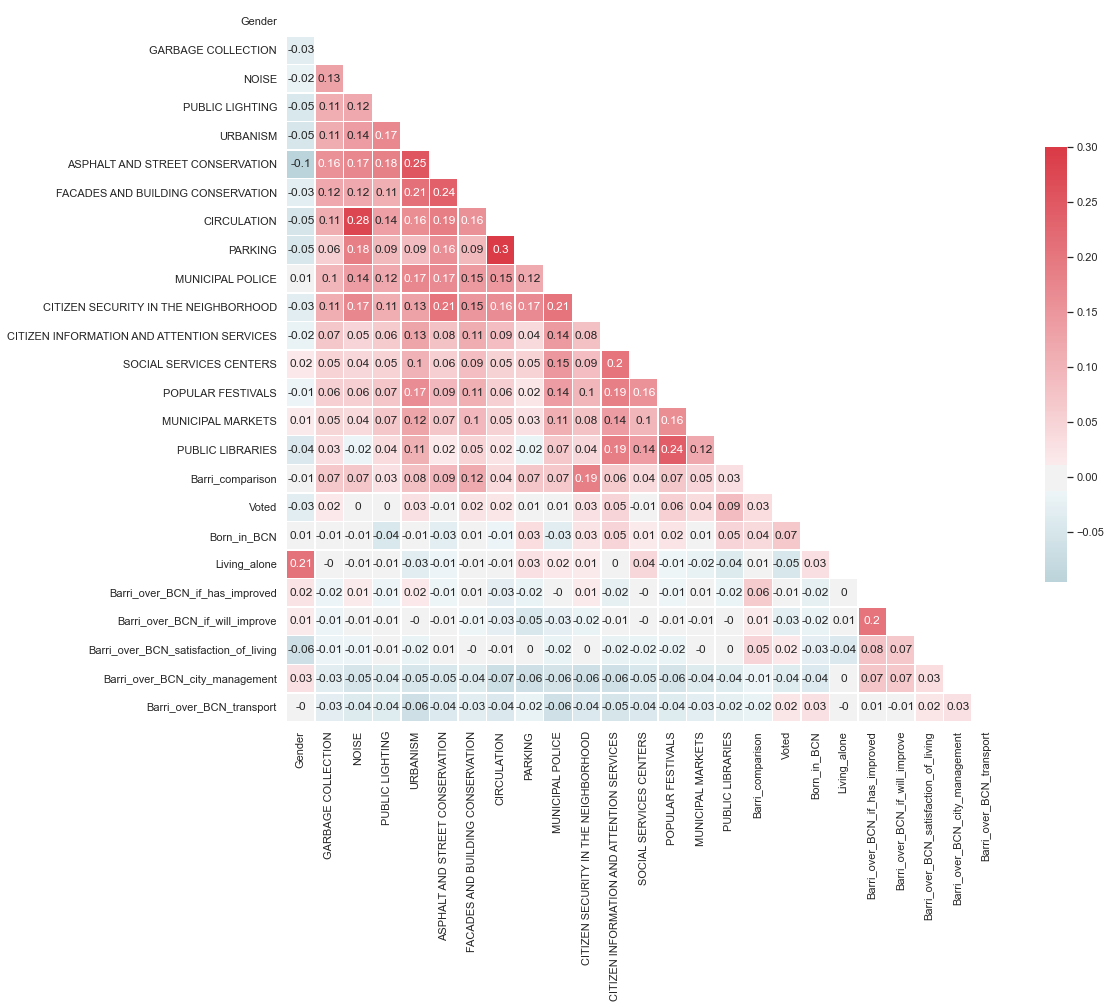

In [30]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = data_train[independent].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
data_test = pd.get_dummies(data_test)

In [32]:
data_test.groupby(['Stay_in_the_same_neighborhood']).size()

Stay_in_the_same_neighborhood
0     417
1    1065
dtype: int64

In [33]:
print("Rate if we predict 1 for whole dataset: ", data_test.groupby(['Stay_in_the_same_neighborhood']).size()[1]/(data_test.groupby(['Stay_in_the_same_neighborhood']).size()[0]+data_test.groupby(['Stay_in_the_same_neighborhood']).size()[1]))

Rate if we predict 1 for whole dataset:  0.7186234817813765


In [34]:
x_test = data_test[features]
y_test = data_test[dependent]

In [35]:
x_test.shape, os_data_x.shape

((1482, 40), (18864, 40))

In [36]:
# logit_model = sm.Logit(y_test,x_test)
# result=logit_model.fit()
# print(result.summary2())

In [37]:
# yhat = logit_model.predict(x_test)
# prediction = list(map(y_test, yhat))
logreg = LogisticRegression(penalty='none')
logreg.fit(os_data_x,os_data_y)
y_pred=logreg.predict(x_test)

C:\Users\THINK\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\THINK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [39]:
# confusion matrix 
cm = confusion_matrix(y_test, y_pred)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, y_pred))

# r2 of the model 
print('R2 = ', r2_score(y_test, y_pred))

Confusion Matrix : 
 [[157 260]
 [212 853]]
Test accuracy =  0.6815114709851552
R2 =  -0.5750869726753807


In [40]:
roc_auc_score(y_test, y_pred)

0.5887188840476913

In [41]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40       417
           1       0.77      0.80      0.78      1065

    accuracy                           0.68      1482
   macro avg       0.60      0.59      0.59      1482
weighted avg       0.67      0.68      0.68      1482



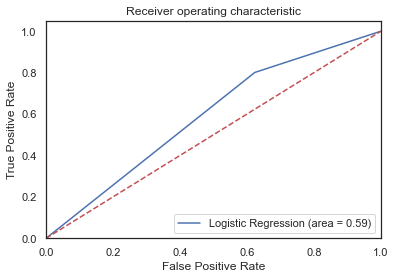

In [42]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(x_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()